----
## Exploring the Data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
import warnings
from time import time
warnings.filterwarnings("ignore")
# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the rain dataset
data = pd.read_csv("rain.csv")

# Display the first ten records
display(data.head(10))

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [2]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

## Data preprocessing

In [3]:
# view number of values in each column
data.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RISK_MM          142193
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

In [4]:
# drop columns with many missing values
data = data.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'],axis=1)
# drop date and location and risk_mm
data = data.drop(['Date','Location','RISK_MM'],axis=1)
# remove records with missing values
data = data.dropna()
display(data.head())

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [5]:
categorical_features = [column for column in data.columns if data[column].dtype=='object']
#view unique values of categorical features
for column in categorical_features:
    print(column,': ',data[column].unique())

WindGustDir :  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am :  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm :  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday :  ['No' 'Yes']
RainTomorrow :  ['No' 'Yes']


** Featureset Exploration **
- MinTemp: continuous
- MaxTemp: continuous
- Rainfall: continuous
- WindGustDir: 'W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE'
- WindGustSpeed: continuous
- WindDir9am: 'W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW' 'WNW' 'NNE'
- WindDir3pm: 'WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S' 'NNE' 'NE'
- WindSpeed9am: continuous
- WindSpeed3pm: continuous
- Humidity9am: continuous
- Humidity3pm: continuous
- Pressure9am: continuous
- Pressure3pm: continuous
- Temp9am: continuous
- Temp3pm: continuous
- RainToday: 'No' 'Yes'
- RISK_MM: continuous

In [6]:
# Total number of records
n_records = data.shape[0]
# Number of records where rain fell the follwing day
rain = data[data.RainTomorrow == 'Yes'].shape[0]
# Number of records where rain did not fall the follwing day
noRain = data[data.RainTomorrow == 'No'].shape[0]

# Percentage of days with rain on the following day
rain_percent = (rain/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("rain occurances: {}".format(rain))
print("no rain occurances: {}".format(noRain))
print("percentage of rain: {:.2f}%".format(rain_percent))

Total number of records: 112925
rain occurances: 25019
no rain occurances: 87906
percentage of rain: 22.16%


#### the probability to rain is relatively low, thus the model will less likely predict a sample as having rain tomorrow

### check for Skewed Continuous Features

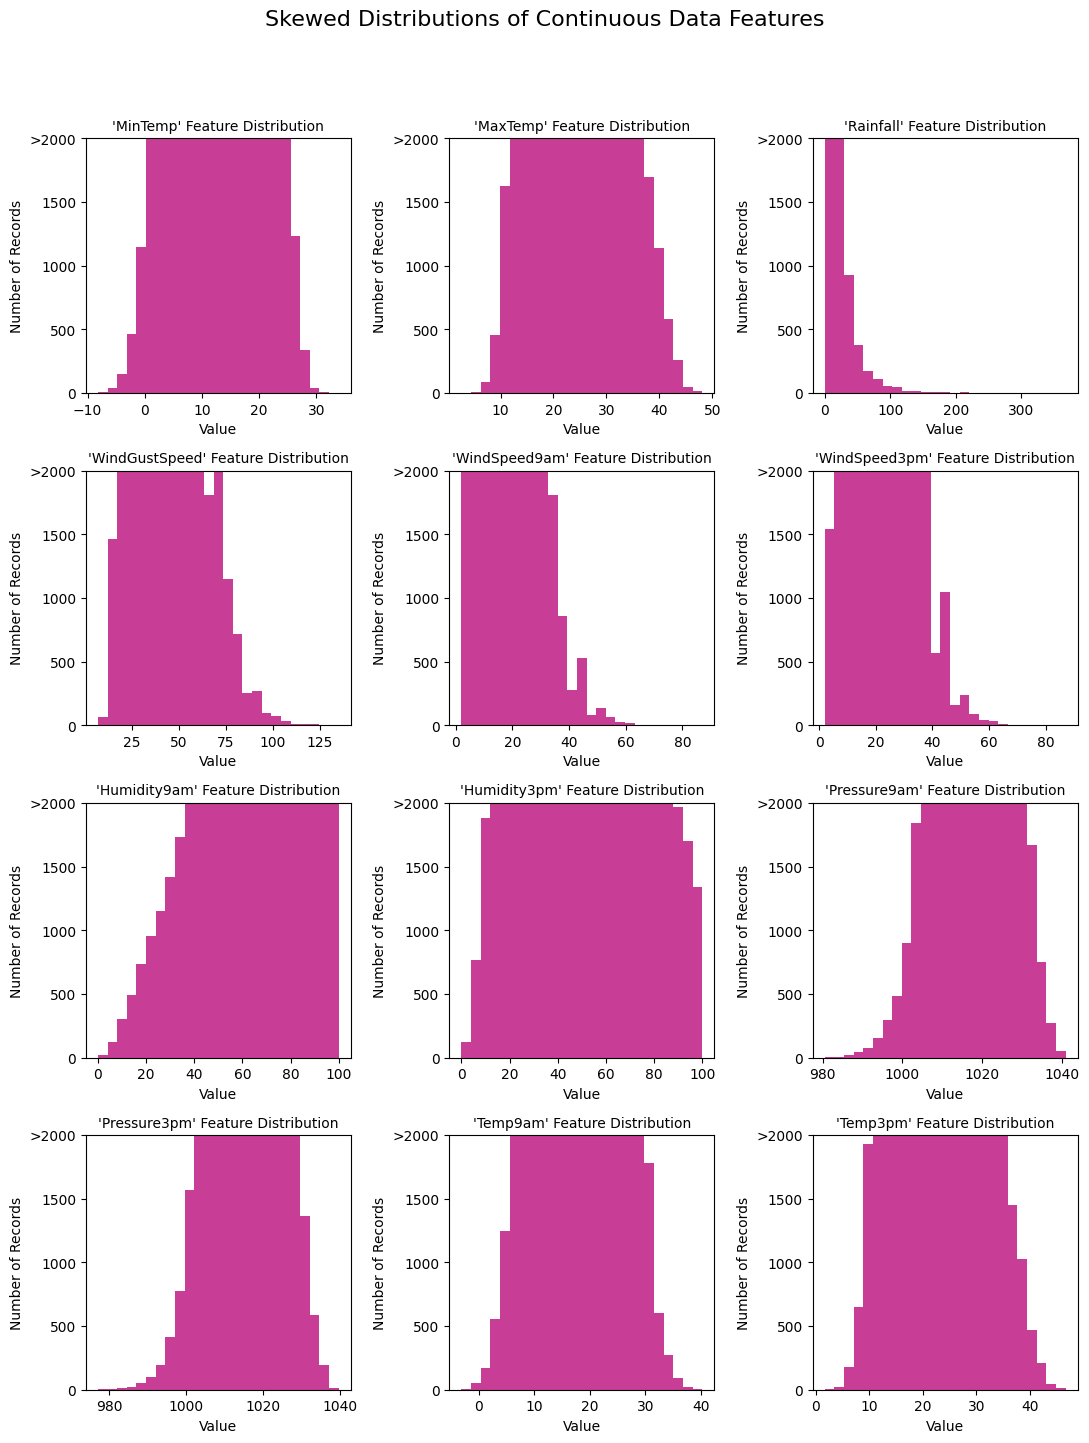

In [7]:
continuous_features = [column for column in data.columns if data[column].dtype=='float64']

# Visualize skewed continuous features of original data
vs.distribution(data,continuous_features)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.470004,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,7.4,25.1,0.000000,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,12.9,25.7,0.000000,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,9.2,28.0,0.000000,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,17.5,32.3,0.693147,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No


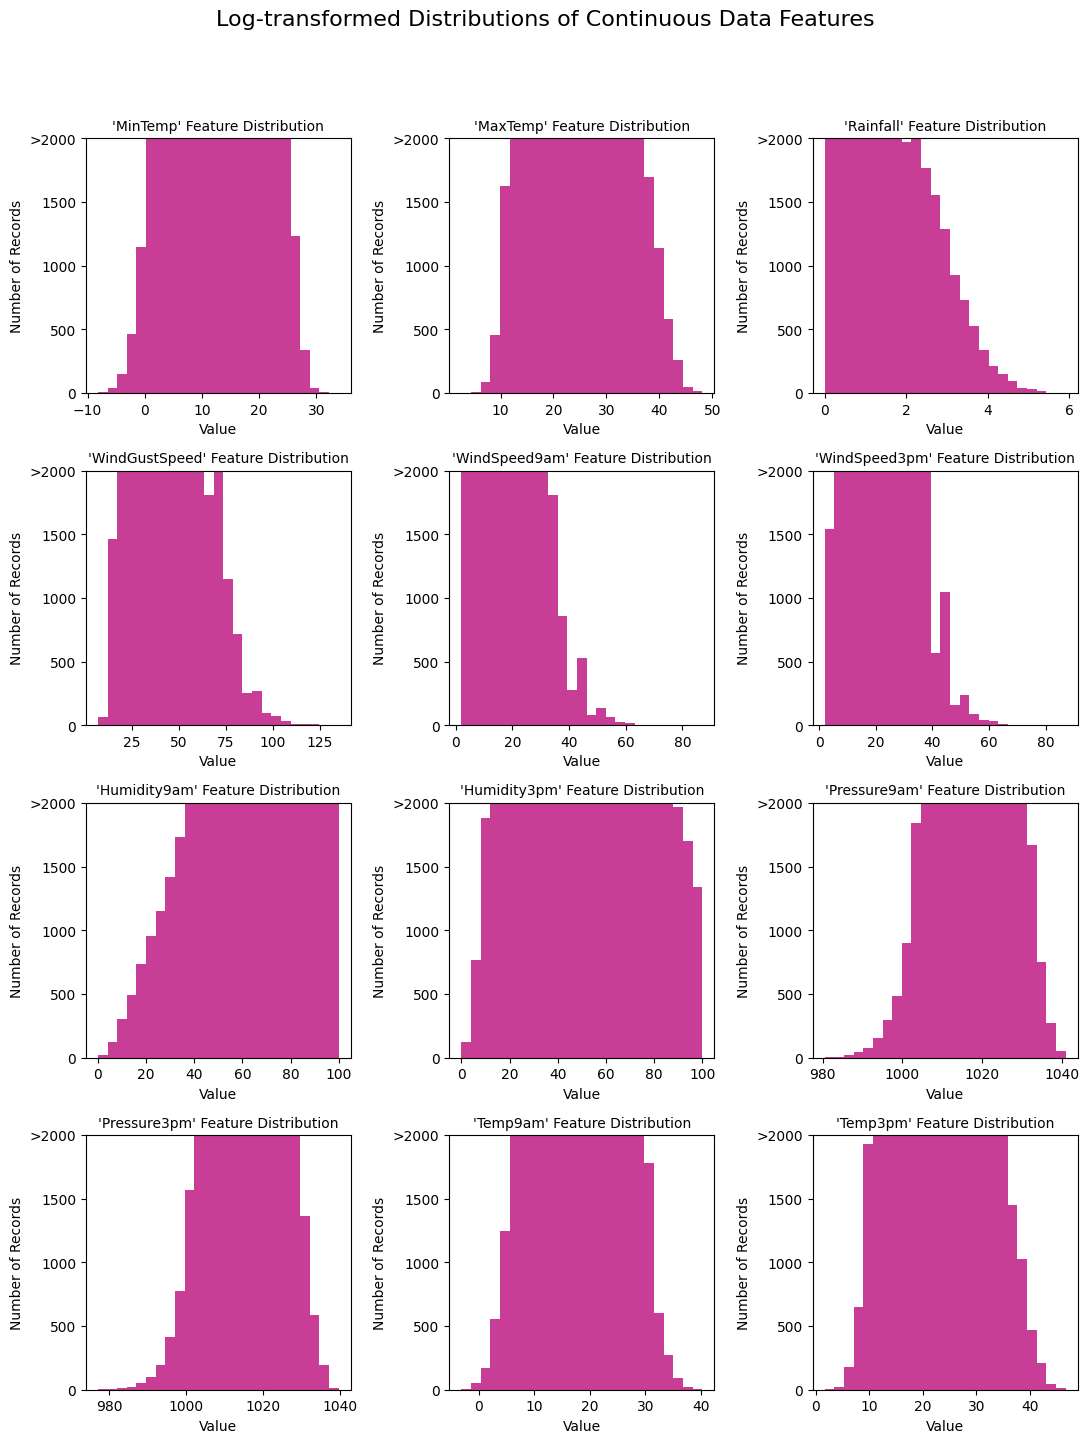

In [8]:
### 
# Split the data into features and target label
RainTomorrow_raw = data['RainTomorrow']

features_raw = data.drop('RainTomorrow', axis = 1)

# Log-transform the skewed features
skewed = ['Rainfall']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed,continuous_features, transformed = True)

display(features_log_transformed.head())

<AxesSubplot:>

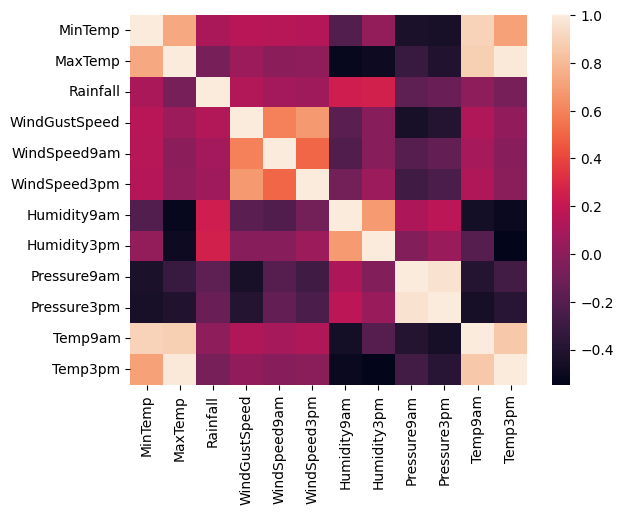

In [9]:
import seaborn as sns

sns.heatmap(data.corr(),annot=False)

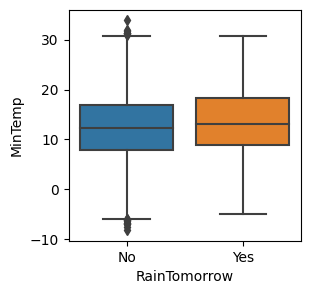

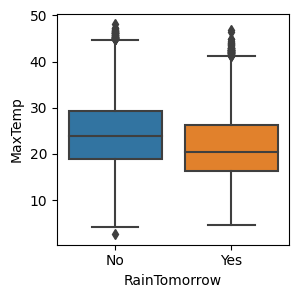

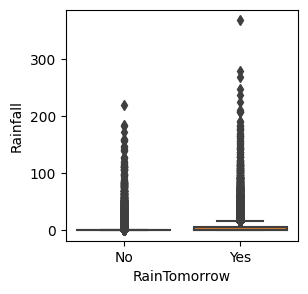

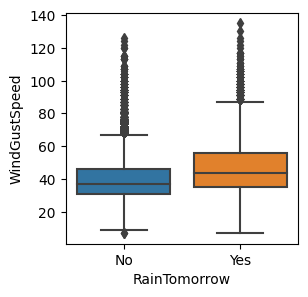

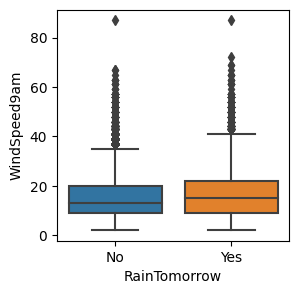

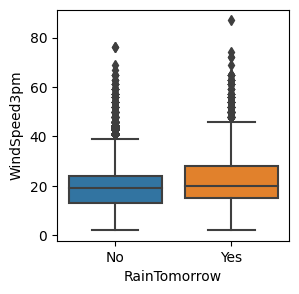

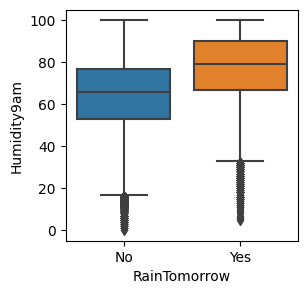

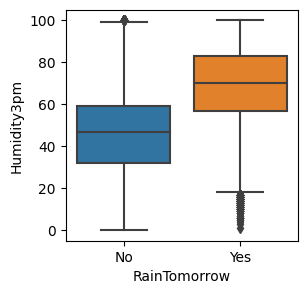

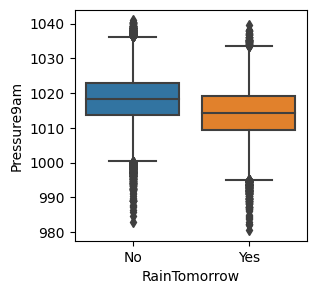

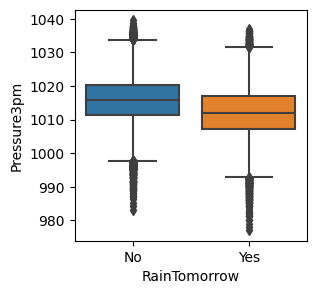

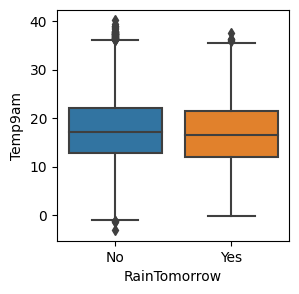

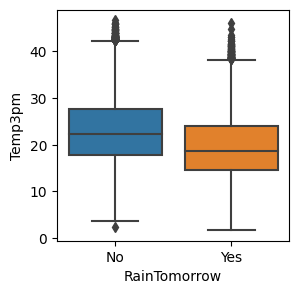

In [10]:
import matplotlib.pyplot as plt
cols = continuous_features
for i in range(0,12):
    fig,axes = plt.subplots(figsize=(3,3))
    sns.boxplot(x='RainTomorrow', y=cols[i], data=data)

##### Normalizing Numerical Features

In [11]:

# Import sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler and apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[continuous_features] = scaler.fit_transform(features_log_transformed[continuous_features])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head())

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.513064,0.446154,0.079531,W,0.289062,W,WNW,0.211765,0.258824,0.71,0.22,0.449587,0.4800,0.461894,0.446667,No
1,0.370546,0.494505,0.000000,WNW,0.289062,NNW,WSW,0.023529,0.235294,0.44,0.25,0.497521,0.4912,0.468822,0.502222,No
2,0.501188,0.507692,0.000000,WSW,0.304688,W,WSW,0.200000,0.282353,0.38,0.30,0.447934,0.5056,0.556582,0.477778,No
3,0.413302,0.558242,0.000000,NE,0.132812,SE,E,0.105882,0.082353,0.45,0.16,0.613223,0.5712,0.489607,0.551111,No
4,0.610451,0.652747,0.117290,W,0.265625,ENE,NW,0.058824,0.211765,0.82,0.33,0.500826,0.4624,0.482679,0.622222,No


In [12]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'RainTomorrow' data to numerical values
RainTomorrow = RainTomorrow_raw.map({"No": 0, "Yes": 1,})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

62 total features after one-hot encoding.
['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 

### Shuffle and Split Data for Training and Testing

In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Import fbeta_score and accuracy_score metrics from sklearn
from sklearn.metrics import accuracy_score,fbeta_score


# Split the 'features' and 'rainTomorrow' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    RainTomorrow, 
                                                    test_size = 0.2, 
                                                    random_state = 120)



# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("percentage of rain in training set: {:.2f}%".format((y_train[y_train== 1].shape[0]/y_train.shape[0])*100))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("percentage of rain in training set: {:.2f}%".format((y_test[y_test == 1].shape[0]/y_test.shape[0])*100))

Training set has 90340 samples.
percentage of rain in training set: 22.16%
Testing set has 22585 samples.
percentage of rain in training set: 22.12%



## Evaluating Model Performance
#### note: the model need to kind of recall the raining possibillity rather than precising about it. in other words, the model does not want to predict a next day as 'not raining' whereas it would not. so it needs to tip the balance a little bit to predict the next day as raining, and only predict it as 'not raining' if sure. in other words, the model needs to reduce the number of false negatives, as it is not ok with the false negtives (predicted as 'not raining' and then it rained), but it is with the false positives (predicted as raining and then it did not rain)

In [14]:


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test,
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=2)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=2)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

Perceptron trained on 903 samples.
Perceptron trained on 9034 samples.
Perceptron trained on 90340 samples.
KNeighborsClassifier trained on 903 samples.
KNeighborsClassifier trained on 9034 samples.
KNeighborsClassifier trained on 90340 samples.
MLPClassifier trained on 903 samples.
MLPClassifier trained on 9034 samples.
MLPClassifier trained on 90340 samples.


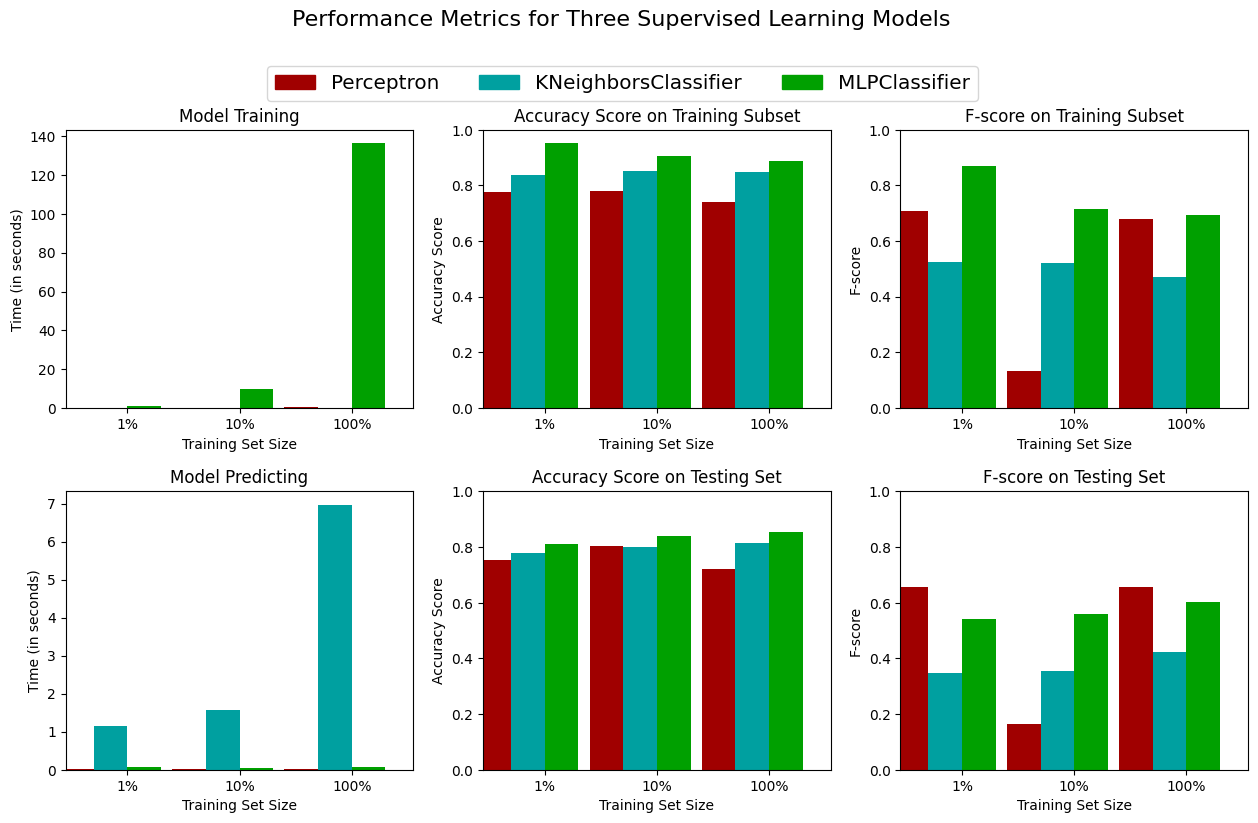

In [15]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
# Initialize the three models
clf_A = Perceptron(random_state=1)
clf_B = KNeighborsClassifier()
clf_C = MLPClassifier(random_state=12)

# assign the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(X_train)
samples_10 = int(len(X_train)*0.1)
samples_1 = int(len(X_train)*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

        
      
# run metrics visualization for the three supervised learning models chosen
vs.evaluate(results)

LogisticRegression trained on 903 samples.
LogisticRegression trained on 9034 samples.
LogisticRegression trained on 90340 samples.
RandomForestClassifier trained on 903 samples.
RandomForestClassifier trained on 9034 samples.
RandomForestClassifier trained on 90340 samples.
XGBClassifier trained on 903 samples.
XGBClassifier trained on 9034 samples.
XGBClassifier trained on 90340 samples.


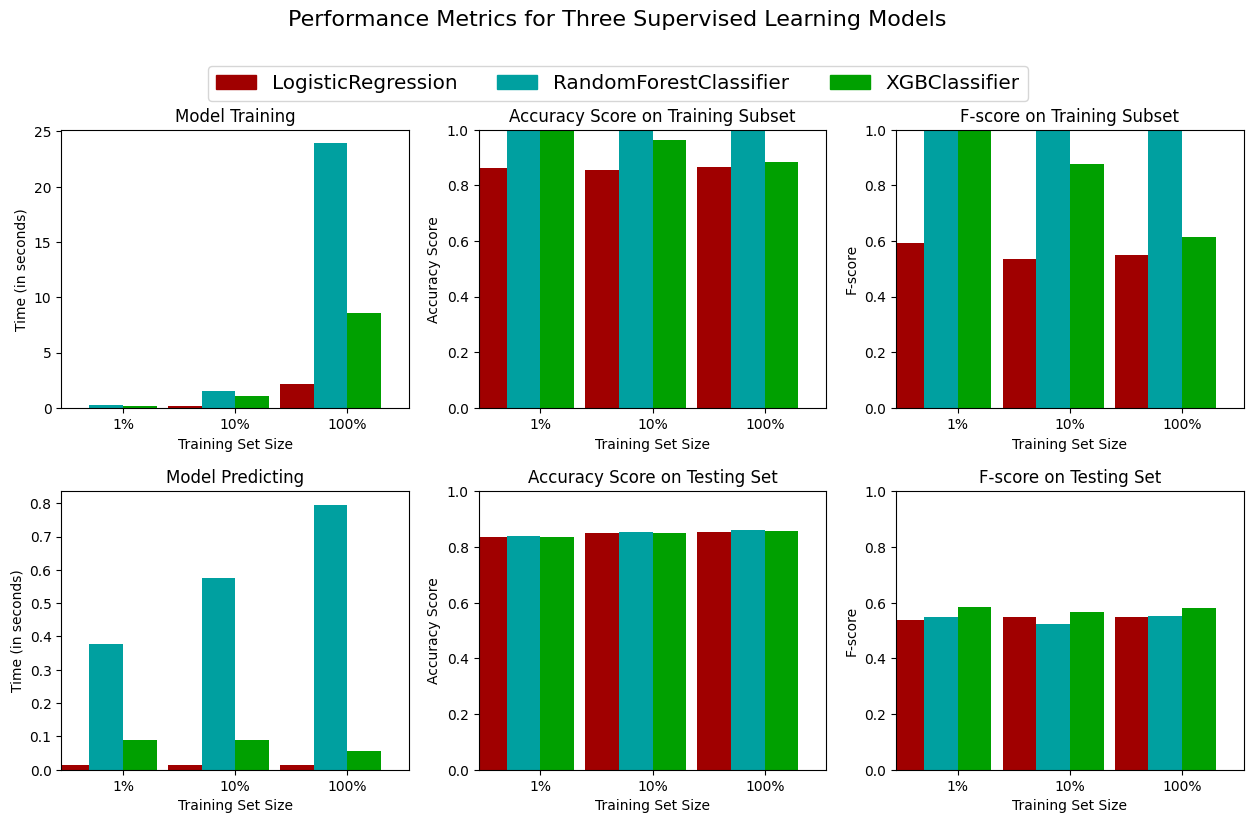

In [16]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
# Initialize the three models
clf_A = LogisticRegression(random_state=1)
clf_B = RandomForestClassifier(random_state=6)
clf_C = XGBClassifier(random_state=12)

# assign the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(X_train)
samples_10 = int(len(X_train)*0.1)
samples_1 = int(len(X_train)*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

        
      
# run metrics visualization for the three supervised learning models chosen
vs.evaluate(results)

## XGBClassifier Optimization

In [17]:
import math
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
# Initialize the classifier
clf = XGBClassifier(random_state=12)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters =  {'n_estimators':[100,150],
                        'eta':[0.3,0.8],
                        'colsample_bylevel':[1,0.9],
                        'gamma':[0.5,0],
                        'base_score':[0.8,0.5]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=2)

# Perform randomized search on the classifier using 'scorer' as the scoring method using RandomizedSearchCV()
rand_obj = RandomizedSearchCV(clf,parameters,scoring=scorer)

# Fit the randomized search object to the training data and find the optimal parameters using fit()
rand_fit = rand_obj.fit(X_train,y_train)

# Get the estimator
best_clf = rand_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F0-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0)))
print("F0.5-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = .5)))
print("F1-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 1)))
print("F2-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("F+inf-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = math.inf)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F0-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0)))
print("F0.5-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = .5)))
print("F1-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 1)))
print("F2-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
print("F+inf-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = math.inf)))

Unoptimized model
------
Accuracy score on testing data: 0.8596
F0-score on testing data: 0.7470
F0.5-score on testing data: 0.6978
F1-score on testing data: 0.6351
F2-score on testing data: 0.5828
F+inf-score on testing data: 0.5524

Optimized Model
------
Final accuracy score on the testing data: 0.8514
F0-score on testing data: 0.7061
F0.5-score on testing data: 0.6716
F1-score on testing data: 0.6259
F2-score on testing data: 0.5860
F+inf-score on testing data: 0.5620


#### the model got optimized a little bit considering F-score

----
## Feature Importance: 
#### if it is found out that  metrics of a dimentionality-reduced model have very little difference from the metrics of the model with the highest metrics acheived, then the dimentionality-reduced model will be picked for faster prediction

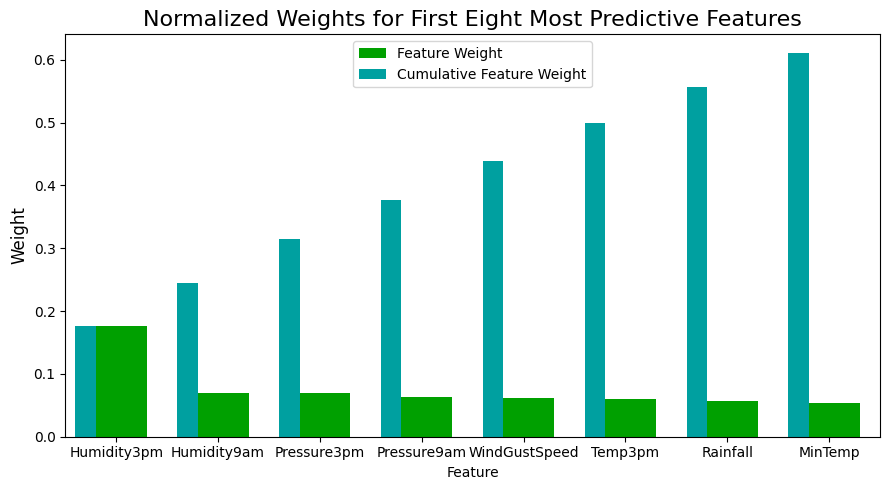

In [18]:
# Import a model with (feature_importances_) 
from sklearn.ensemble import RandomForestClassifier

# Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_ 

# Plot
vs.feature_plot(importances, X_train, y_train)

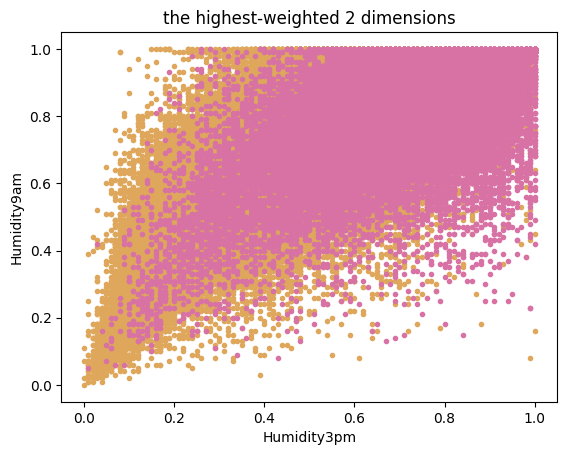

In [19]:

data_log_minmax_transform = pd.concat([features_log_minmax_transform,RainTomorrow],axis=1)

plt.plot(data_log_minmax_transform[data_log_minmax_transform['RainTomorrow']==0]['Humidity3pm'], data_log_minmax_transform[data_log_minmax_transform['RainTomorrow']==0]['Humidity9am'],'.',label='NO RAIN', color ='#dea75b')
plt.plot(data_log_minmax_transform[data_log_minmax_transform['RainTomorrow']==1]['Humidity3pm'], data_log_minmax_transform[data_log_minmax_transform['RainTomorrow']==1]['Humidity9am'],'.', label='RAIN',color ='#d872a5')

plt.title('the highest-weighted 2 dimensions')
plt.xlabel('Humidity3pm')
plt.ylabel('Humidity9am')

plt.show()

In [20]:
# Import functionality for cloning a model
from sklearn.base import clone
# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:8]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:8]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-0score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0)))
print("F-0.5score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("F-1score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 1)))
print("F-2score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
print("F-+infscore on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = math.inf)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-0score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0)))
print("F-0.5score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))
print("F-1score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 1)))
print("F-2score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 2)))
print("F-+infscore on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = math.inf)))

Final Model trained on full data
------
Accuracy on testing data: 0.8514
F-0score on testing data: 0.7061
F-0.5score on testing data: 0.6716
F-1score on testing data: 0.6259
F-2score on testing data: 0.5860
F-+infscore on testing data: 0.5620

Final Model trained on reduced data
------
Accuracy on testing data: 0.8440
F-0score on testing data: 0.6961
F-0.5score on testing data: 0.6530
F-1score on testing data: 0.5974
F-2score on testing data: 0.5506
F-+infscore on testing data: 0.5232


#### hmmmm.. let us save the model built on that shrunk dataset for now.. I will discuss the why of it shorly..

In [21]:
#save the model
import pickle
pickle.dump(clf, open('classifier.sav', 'wb'))



In [22]:
# load the model
model = pickle.load(open('classifier.sav', 'rb'))

# view some real values and their prediction
print('real: ',y_test[1430:1454].tolist())
print('pred: ',model.predict(X_test_reduced[1430:1454]).tolist())
   



real:  [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
pred:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


#### as we can see, the model hardly predicts as 'will rain' (F-2score = 0.5626), which results in significant number of missed rains (false negatives), and when it predicts as 'will rain' it is usually correct (the model observed a very similar sample in training data). this is more precision shadowing recall. the output of the previous cell is not the only evidance for that. the real evidance that we needed the model to be a little active regarding classifying as 'will rain' so it recalls the rain more, so we measured we measured its tendency (beta = 2) to classify as 'will rain', and we got about 56% as a result, this means the model classified only 56% of real 'will rain's as 'will rain' or even less (it will be -56% if we measure the full tendancy (recall) to classify as 'will rain') as the model less tends to rain it, because of the data distribution (only 22% for rains), so this model makes the majority of the accuracy thanks to the many negative predictions as it is 88% true if prediction is negative ('won't rain'). we need to elevate the rate of true postives even at the expence of true negatives.

#### we now have a model whose 'will rain' prediction is precised. you can think of it as the model does not output 'will rain' unless it is sure. this can be used as an indication for high rain probability if 'will rain' is outputted from this model

In [23]:
# build dataframe to scale the input sample on
# note: all features selected are still standing there in features_raw

features_log_transformed_reduced = features_log_transformed.loc[:,X_train.columns.values[(np.argsort(importances)[::-1])[:8]]]
features_log_transformed_reduced_description = features_log_transformed.describe()
print(features_log_transformed_reduced.describe())

         Humidity3pm    Humidity9am    Pressure3pm    Pressure9am  \
count  112925.000000  112925.000000  112925.000000  112925.000000   
mean       50.669055      67.404162    1015.048962    1017.425847   
std        20.768550      18.911610       6.957822       7.032654   
min         0.000000       0.000000     977.100000     980.500000   
25%        36.000000      56.000000    1010.300000    1012.800000   
50%        51.000000      68.000000    1015.000000    1017.400000   
75%        65.000000      81.000000    1019.700000    1022.100000   
max       100.000000     100.000000    1039.600000    1041.000000   

       WindGustSpeed        Temp3pm       Rainfall        MinTemp  
count  112925.000000  112925.000000  112925.000000  112925.000000  
mean       40.786611      22.127306       0.486864      12.664721  
std        13.321774       6.837380       0.907724       6.254135  
min         7.000000       1.700000       0.000000      -8.200000  
25%        31.000000      16.900000   

In [24]:
# build a dataframe of min and max values

data_to_scale_by =pd.DataFrame( {'Humidity3pm': [0, 100],
                                 'Humidity9am': [0, 100],
                    'Pressure3pm': [977.1, 1039.6],
                    'Pressure9am': [980.5, 1041.0],
                    'WindGustSpeed': [7, 135],
                    'Temp3pm': [1.7, 46.7],
                    'Rainfall': [0, 5.909712],
                    'MinTemp': [-8.2, 33.9],             
                    })
# save the dataframe  of min and max values
pickle.dump(data_to_scale_by, open('data_to_scale_by.sav', 'wb'))

data_to_scale_by.head()
  

,Humidity3pm,Humidity9am,Pressure3pm,Pressure9am,WindGustSpeed,Temp3pm,Rainfall,MinTemp
0,0,0,977.1,980.5,7,1.7,0.000000,-8.2
1,100,100,1039.6,1041.0,135,46.7,5.909712,33.9


#### note: the sample to have its class predicted sholud be scaled on this data and should have its Rainfall value log-transformed (log(value+1))

#### now let us build a model which is, in contract to the built one, higher in recall. we need this model to tip the balance to the favour of 'will rain' class. this can be done through rebalancing the data distribution so 'won't rain' class has a less count of occurances and less percentage and less probability to be outputted by the model. (if a model disniguishes a male from a female had a data set of 200 females and only 2 males with beard, the model would think that 'beard_no' is a characteristic discriminating females only and would classify any male with no bread as a female as it had no enough males to take note of presence of males with no breads. the less the model knows about some class the more it think it finds characteristics discriminating the other class, and the more it classifies as it for that discriminating characteristics though to be found, despite of being a chracteristic of both classes. this might be benefitable for the general accuracy if males are really that rare in the real world, the model then would hardly predict as 'male' (only if the sample has bread) and would predict as 'female' a lot and acheive 200/202 accuracy (considering the same probability present in real world as mentioned), this would be good for 'female' recall as well, but bad for 'female precision' (or 'male' recall), the model then would need to see a male sample with very similar characteristics found in training data (a man with bread) to classify him as a male).
#### so, we need to have the 'will rain' class higher in percentage so it is more discriminable by some characteristics (or combination of them). this may  show higher 'will rain' recall but lower accuracy at the last, because the data has got significant number of 'won't rain' classes and accuracy do not want many of them to be the victim of possible excessive 'will rain' predictions that seek to recall every single raindrop.
#### we will use the shrunk data for this model as well

In [25]:
# view percentages to adapt
print("Training set has {} samples.".format(X_train_reduced.shape[0]))
print("percentage of rain in training set: {:.2f}%".format((y_train[y_train== 1].shape[0]/y_train.shape[0])*100))
print("Testing set has {} samples.".format(X_test_reduced.shape[0]))
print("percentage of rain in training set: {:.2f}%".format((y_test[y_test == 1].shape[0]/y_test.shape[0])*100))

Training set has 90340 samples.
percentage of rain in training set: 22.16%
Testing set has 22585 samples.
percentage of rain in training set: 22.12%


In [26]:
# concatenate X_train and y_train back  
full_train_reduced = pd.concat([X_train_reduced,y_train],axis=1)
# take only a subset of the training samples labeled 0
subset_of_no_rain_samples_reduced = (pd.DataFrame(full_train_reduced[RainTomorrow  == 0][0:25000]))

# take all of the training samples labeled 1

all_of_rain_samples_reduced = (pd.DataFrame(full_train_reduced[RainTomorrow  == 1]))

# gather both of them into a single dataframe
full_train_with_subset_of_no_rain_reduced = subset_of_no_rain_samples_reduced.append(all_of_rain_samples_reduced,  ignore_index=True)

# dispaly the first five records
full_train_with_subset_of_no_rain_reduced.head()


,Humidity3pm,Humidity9am,Pressure3pm,Pressure9am,WindGustSpeed,Temp3pm,Rainfall,MinTemp,RainTomorrow
0,0.73,0.70,0.6576,0.647934,0.351562,0.353333,0.00000,0.548694,0
1,0.22,0.18,0.6416,0.677686,0.304688,0.524444,0.00000,0.543943,0
2,0.65,0.82,0.7472,0.760331,0.179688,0.313333,0.00000,0.315914,0
3,0.59,0.69,0.4560,0.480992,0.265625,0.711111,0.26543,0.862233,0
4,0.58,0.69,0.8176,0.823140,0.179688,0.320000,0.00000,0.268409,0


In [27]:
# dispaly the first last records
full_train_with_subset_of_no_rain_reduced.tail()


,Humidity3pm,Humidity9am,Pressure3pm,Pressure9am,WindGustSpeed,Temp3pm,Rainfall,MinTemp,RainTomorrow
45018,0.93,0.87,0.4672,0.452893,0.523438,0.484444,0.000000,0.745843,1
45019,0.88,0.70,0.6336,0.608264,0.304688,0.266667,0.133417,0.451306,1
45020,0.39,0.68,0.4064,0.469421,0.320312,0.380000,0.334040,0.384798,1
45021,0.89,0.99,0.6944,0.720661,0.218750,0.182222,0.099461,0.296912,1
45022,0.81,0.74,0.5552,0.618182,0.335938,0.364444,0.030851,0.520190,1


In [28]:
# Split the data into features and target label
y_train_with_subset_of_no_rain = full_train_with_subset_of_no_rain_reduced['RainTomorrow']

X_train_with_subset_of_no_rain_reduced = full_train_with_subset_of_no_rain_reduced.drop('RainTomorrow', axis = 1)



# Show the results of the split
print("Training set has {} samples.".format(X_train_with_subset_of_no_rain_reduced.shape[0]))
print("percentage of rain in training set: {:.2f}%".format((y_train_with_subset_of_no_rain[y_train_with_subset_of_no_rain== 1].shape[0]/y_train_with_subset_of_no_rain.shape[0])*100))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("percentage of rain in training set: {:.2f}%".format((y_test[y_test == 1].shape[0]/y_test.shape[0])*100))


Training set has 45023 samples.
percentage of rain in training set: 44.47%
Testing set has 22585 samples.
percentage of rain in training set: 22.12%


#### as you can see, the portion 'will rain' samples in training set got bigger and kept the same in test set as this what will appear in real world

In [29]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
# Initialize the classifier
clf_2 = XGBClassifier(random_state=12)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters =  {'n_estimators':[100,150],
                        'eta':[0.3,0.8],
                        'colsample_bylevel':[1,0.9],
                        'gamma':[0.5,0],
                        'base_score':[0.8,0.5]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=2)

# Perform randomized search on the classifier using 'scorer' as the scoring method using RandomizedSearchCV()
rand_obj = RandomizedSearchCV(clf_2,parameters,scoring=scorer)

# Fit the randomized search object to the training data and find the optimal parameters using fit()

rand_fit = rand_obj.fit(X_train_with_subset_of_no_rain_reduced,y_train_with_subset_of_no_rain)


# Get the estimator
best_clf_2 = rand_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_2.fit(X_train_with_subset_of_no_rain_reduced, y_train_with_subset_of_no_rain)).predict(X_test_reduced)
best_predictions = best_clf_2.predict(X_test_reduced)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F0-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0)))
print("F0.5-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = .5)))
print("F1-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 1)))
print("F2-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("F+inf-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = math.inf)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F0-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0)))
print("F0.5-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = .5)))
print("F1-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 1)))
print("F2-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
print("F+inf-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = math.inf)))

Unoptimized model
------
Accuracy score on testing data: 0.8242
F0-score on testing data: 0.5805
F0.5-score on testing data: 0.6066
F1-score on testing data: 0.6504
F2-score on testing data: 0.7010
F+inf-score on testing data: 0.7394

Optimized Model
------
Final accuracy score on the testing data: 0.8236
F0-score on testing data: 0.5788
F0.5-score on testing data: 0.6057
F1-score on testing data: 0.6510
F2-score on testing data: 0.7035
F+inf-score on testing data: 0.7436


#### well well well well, this model gives a higher f-score with higher beta value (closer to recall), this model still tends less to predict as 'will rain' than 'won't rain' .. but the tendency to 'rain' it is higher than the first model's, and hence higher than the normal 'rain' tendency (20%)

#### let's save it as 'moderate Classifier'

In [30]:
#save the model
import pickle
pickle.dump(best_clf_2, open('moderate Classifier.sav', 'wb'))

In [31]:
# load the model
model = pickle.load(open('moderate Classifier.sav', 'rb'))

# view some real values and their prediction
print('real: ',y_test[1430:1454].tolist())
print('pred: ',model.predict(X_test_reduced[1430:1454]).tolist())


real:  [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
pred:  [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]


#### as you can see, this model tends to rain it more than the first one. now, the error percentage is contributed to by more amount of false positives than it was in the first model because of the more tendancy to 'positive' it than the first model 

In [32]:
# concatenate X_train and y_train back  
full_train_reduced = pd.concat([X_train_reduced,y_train],axis=1)
# take only a subset of the training samples labeled 0
subset_of_no_rain_samples_reduced = (pd.DataFrame(full_train_reduced[RainTomorrow  == 0][0:13000]))

# take all of the training samples labeled 1

all_of_rain_samples_reduced = (pd.DataFrame(full_train_reduced[RainTomorrow  == 1]))

# gather both of them into a single dataframe
full_train_with_subset_of_no_rain_reduced = subset_of_no_rain_samples_reduced.append(all_of_rain_samples_reduced,  ignore_index=True)

# dispaly the first five records
full_train_with_subset_of_no_rain_reduced.head()

,Humidity3pm,Humidity9am,Pressure3pm,Pressure9am,WindGustSpeed,Temp3pm,Rainfall,MinTemp,RainTomorrow
0,0.73,0.70,0.6576,0.647934,0.351562,0.353333,0.00000,0.548694,0
1,0.22,0.18,0.6416,0.677686,0.304688,0.524444,0.00000,0.543943,0
2,0.65,0.82,0.7472,0.760331,0.179688,0.313333,0.00000,0.315914,0
3,0.59,0.69,0.4560,0.480992,0.265625,0.711111,0.26543,0.862233,0
4,0.58,0.69,0.8176,0.823140,0.179688,0.320000,0.00000,0.268409,0


In [33]:
# dispaly the first last records
full_train_with_subset_of_no_rain_reduced.tail()

,Humidity3pm,Humidity9am,Pressure3pm,Pressure9am,WindGustSpeed,Temp3pm,Rainfall,MinTemp,RainTomorrow
33018,0.93,0.87,0.4672,0.452893,0.523438,0.484444,0.000000,0.745843,1
33019,0.88,0.70,0.6336,0.608264,0.304688,0.266667,0.133417,0.451306,1
33020,0.39,0.68,0.4064,0.469421,0.320312,0.380000,0.334040,0.384798,1
33021,0.89,0.99,0.6944,0.720661,0.218750,0.182222,0.099461,0.296912,1
33022,0.81,0.74,0.5552,0.618182,0.335938,0.364444,0.030851,0.520190,1


In [34]:
# Split the data into features and target label
y_train_with_subset_of_no_rain = full_train_with_subset_of_no_rain_reduced['RainTomorrow']

X_train_with_subset_of_no_rain_reduced = full_train_with_subset_of_no_rain_reduced.drop('RainTomorrow', axis = 1)



# Show the results of the split
print("Training set has {} samples.".format(X_train_with_subset_of_no_rain_reduced.shape[0]))
print("percentage of rain in training set: {:.2f}%".format((y_train_with_subset_of_no_rain[y_train_with_subset_of_no_rain== 1].shape[0]/y_train_with_subset_of_no_rain.shape[0])*100))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("percentage of rain in training set: {:.2f}%".format((y_test[y_test == 1].shape[0]/y_test.shape[0])*100))

Training set has 33023 samples.
percentage of rain in training set: 60.63%
Testing set has 22585 samples.
percentage of rain in training set: 22.12%


In [35]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
# Initialize the classifier
clf_3 = XGBClassifier(random_state=12)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters =  {'n_estimators':[100,150],
                        'eta':[0.3,0.8],
                        'colsample_bylevel':[1,0.9],
                        'gamma':[0.5,0],
                        'base_score':[0.8,0.5]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=2)

# Perform randomized search on the classifier using 'scorer' as the scoring method using RandomizedSearchCV()
rand_obj = RandomizedSearchCV(clf_3,parameters,scoring=scorer)

# Fit the randomized search object to the training data and find the optimal parameters using fit()

rand_fit = rand_obj.fit(X_train_with_subset_of_no_rain_reduced,y_train_with_subset_of_no_rain)


# Get the estimator
best_clf_3 = rand_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_3.fit(X_train_with_subset_of_no_rain_reduced, y_train_with_subset_of_no_rain)).predict(X_test_reduced)
best_predictions = best_clf_3.predict(X_test_reduced)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F0-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0)))
print("F0.5-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = .5)))
print("F1-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 1)))
print("F2-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("F+inf-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = math.inf)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F0-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0)))
print("F0.5-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = .5)))
print("F1-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 1)))
print("F2-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
print("F+inf-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = math.inf)))

Unoptimized model
------
Accuracy score on testing data: 0.7520
F0-score on testing data: 0.4668
F0.5-score on testing data: 0.5133
F1-score on testing data: 0.6032
F2-score on testing data: 0.7315
F+inf-score on testing data: 0.8523

Optimized Model
------
Final accuracy score on the testing data: 0.7520
F0-score on testing data: 0.4668
F0.5-score on testing data: 0.5134
F1-score on testing data: 0.6037
F2-score on testing data: 0.7324
F+inf-score on testing data: 0.8539


In [36]:
#save the model
import pickle
pickle.dump(best_clf_3, open('hyper Classifier.sav', 'wb'))

In [37]:
# load the model
model = pickle.load(open('hyper Classifier.sav', 'rb'))

# view some real values and their prediction
print('real: ',y_test[1430:1454].tolist())
print('pred: ',model.predict(X_test_reduced[1430:1454]).tolist())

real:  [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
pred:  [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]


#### as you can see, this model tends more and more to rain it than the isecond one. now, the error percentage is added a lot of to by false positives and accuracy is now obviously decreased 


#### now we have two models:
#### 1- a model that is sure if it predicts as 'will rain' so it can be used then as an indication of high rain probability
this model tends more to classify as negative 
(1 detected out of 5 .. no false positives)
#### 2- a model that is suffeciently suspiscious  if it predicts as 'will rain' so it can be used then as an indication of medium rain probability
this model still tends more to classify as negative but in a cooler manner than model 1
(4 detected out of 5 .. 3 false positives)
however it has higher recall than precision because its (+) prediction probability (44%) overcame the (+) occurence in testing set
#### 3- a model that is little suspiscious if it predicts as 'will rain' so it can be used then as an indication of low rain probability
this model tends more to classify as positive
(5 detected out of 5 .. 5 false positives)